# Causal Discovery Algorithms

In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder

DATA_PATH = "/home/decaro/xai-hack/data/credit_card_churn.csv"
RANDOM_STATE = 42
MAX_ITER = 100

# Seed everything for reproducibility
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)


df = pd.read_csv(DATA_PATH)
df.head()

df_vanilla = df.copy()

le_Education_Level = LabelEncoder()
le_Gender = LabelEncoder()
le_Income_Category = LabelEncoder()
le_Card_Category = LabelEncoder()
le_Marital_Status = LabelEncoder()

df['Education_Level_n'] = le_Education_Level.fit_transform(df['Education_Level'])
df['Income_Category_n'] = le_Income_Category.fit_transform(df['Income_Category'])
df['Card_Category_n'] = le_Card_Category.fit_transform(df['Card_Category'])
df['Gender_n'] = le_Gender.fit_transform(df['Gender'])
df['Marital_Status_n'] = le_Marital_Status.fit_transform(df['Marital_Status'])
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
df = df.drop([ 'Education_Level',  'Income_Category', 'Card_Category','CLIENTNUM', 'Gender', 'Marital_Status'], axis = 1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_n,Income_Category_n,Card_Category_n,Gender_n,Marital_Status_n
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3,2,0,1,1
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2,4,0,0,2
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2,3,0,1,1
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,3,4,0,0,3
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,5,2,0,1,1


In [11]:
X = df.to_numpy()
print(X.shape, X[:5, :])
# Normalize data
X = (X - X.mean(axis=0)) / X.std(axis=0)
print(X.shape, X[:5, :])


(10127, 20) [[1.0000e+00 4.5000e+01 3.0000e+00 3.9000e+01 5.0000e+00 1.0000e+00
  3.0000e+00 1.2691e+04 7.7700e+02 1.1914e+04 1.3350e+00 1.1440e+03
  4.2000e+01 1.6250e+00 6.1000e-02 3.0000e+00 2.0000e+00 0.0000e+00
  1.0000e+00 1.0000e+00]
 [1.0000e+00 4.9000e+01 5.0000e+00 4.4000e+01 6.0000e+00 1.0000e+00
  2.0000e+00 8.2560e+03 8.6400e+02 7.3920e+03 1.5410e+00 1.2910e+03
  3.3000e+01 3.7140e+00 1.0500e-01 2.0000e+00 4.0000e+00 0.0000e+00
  0.0000e+00 2.0000e+00]
 [1.0000e+00 5.1000e+01 3.0000e+00 3.6000e+01 4.0000e+00 1.0000e+00
  0.0000e+00 3.4180e+03 0.0000e+00 3.4180e+03 2.5940e+00 1.8870e+03
  2.0000e+01 2.3330e+00 0.0000e+00 2.0000e+00 3.0000e+00 0.0000e+00
  1.0000e+00 1.0000e+00]
 [1.0000e+00 4.0000e+01 4.0000e+00 3.4000e+01 3.0000e+00 4.0000e+00
  1.0000e+00 3.3130e+03 2.5170e+03 7.9600e+02 1.4050e+00 1.1710e+03
  2.0000e+01 2.3330e+00 7.6000e-01 3.0000e+00 4.0000e+00 0.0000e+00
  0.0000e+00 3.0000e+00]
 [1.0000e+00 4.0000e+01 3.0000e+00 2.1000e+01 5.0000e+00 1.0000e+00
  0.

/home/decaro/.conda/envs/xaihack/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/decaro/.conda/envs/xaihack/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 7 iterations, alpha=5.479e-05, previous alpha=5.236e-05, with an active set of 6 regressors.
  warnings.warn(
/home/decaro/.conda/envs/xaihack/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 18 iterations, alpha=1.851e-05, previous alpha=1.708e-05, with an active set of 11 regressors.
  warnings.warn(
/home/decaro/.conda/envs/xaihack/lib/python3.11/site-packages/skl

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0]
 [1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0]]
[np.int64(9), np.int64(7), np.int64(8), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64

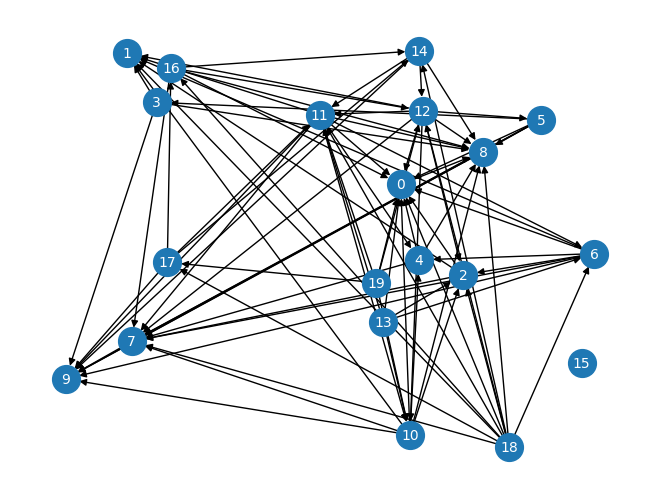

In [12]:

from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM(RANDOM_STATE, MAX_ITER)
model.fit(X)

# Numpy print only two decimal places
with np.printoptions(precision=2):
    print((np.abs(model.adjacency_matrix_) > 0).astype(int))
    print(model.causal_order_)

# Visualize the graph with name of the features
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph(model.adjacency_matrix_)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=400, font_size=10, font_color='white')
plt.show()

In [13]:
# Print the columns with their respective indices
for i, col in enumerate(df.columns):
    print(i, col)

0 Attrition_Flag
1 Customer_Age
2 Dependent_count
3 Months_on_book
4 Total_Relationship_Count
5 Months_Inactive_12_mon
6 Contacts_Count_12_mon
7 Credit_Limit
8 Total_Revolving_Bal
9 Avg_Open_To_Buy
10 Total_Amt_Chng_Q4_Q1
11 Total_Trans_Amt
12 Total_Trans_Ct
13 Total_Ct_Chng_Q4_Q1
14 Avg_Utilization_Ratio
15 Education_Level_n
16 Income_Category_n
17 Card_Category_n
18 Gender_n
19 Marital_Status_n


In [14]:
from causallearn.search.ScoreBased.ExactSearch import bic_exact_search

dag_est, search_stats = bic_exact_search(X)

ValueError: can only convert an array of size 1 to a Python scalar

  0%|          | 0/20 [00:00<?, ?it/s]

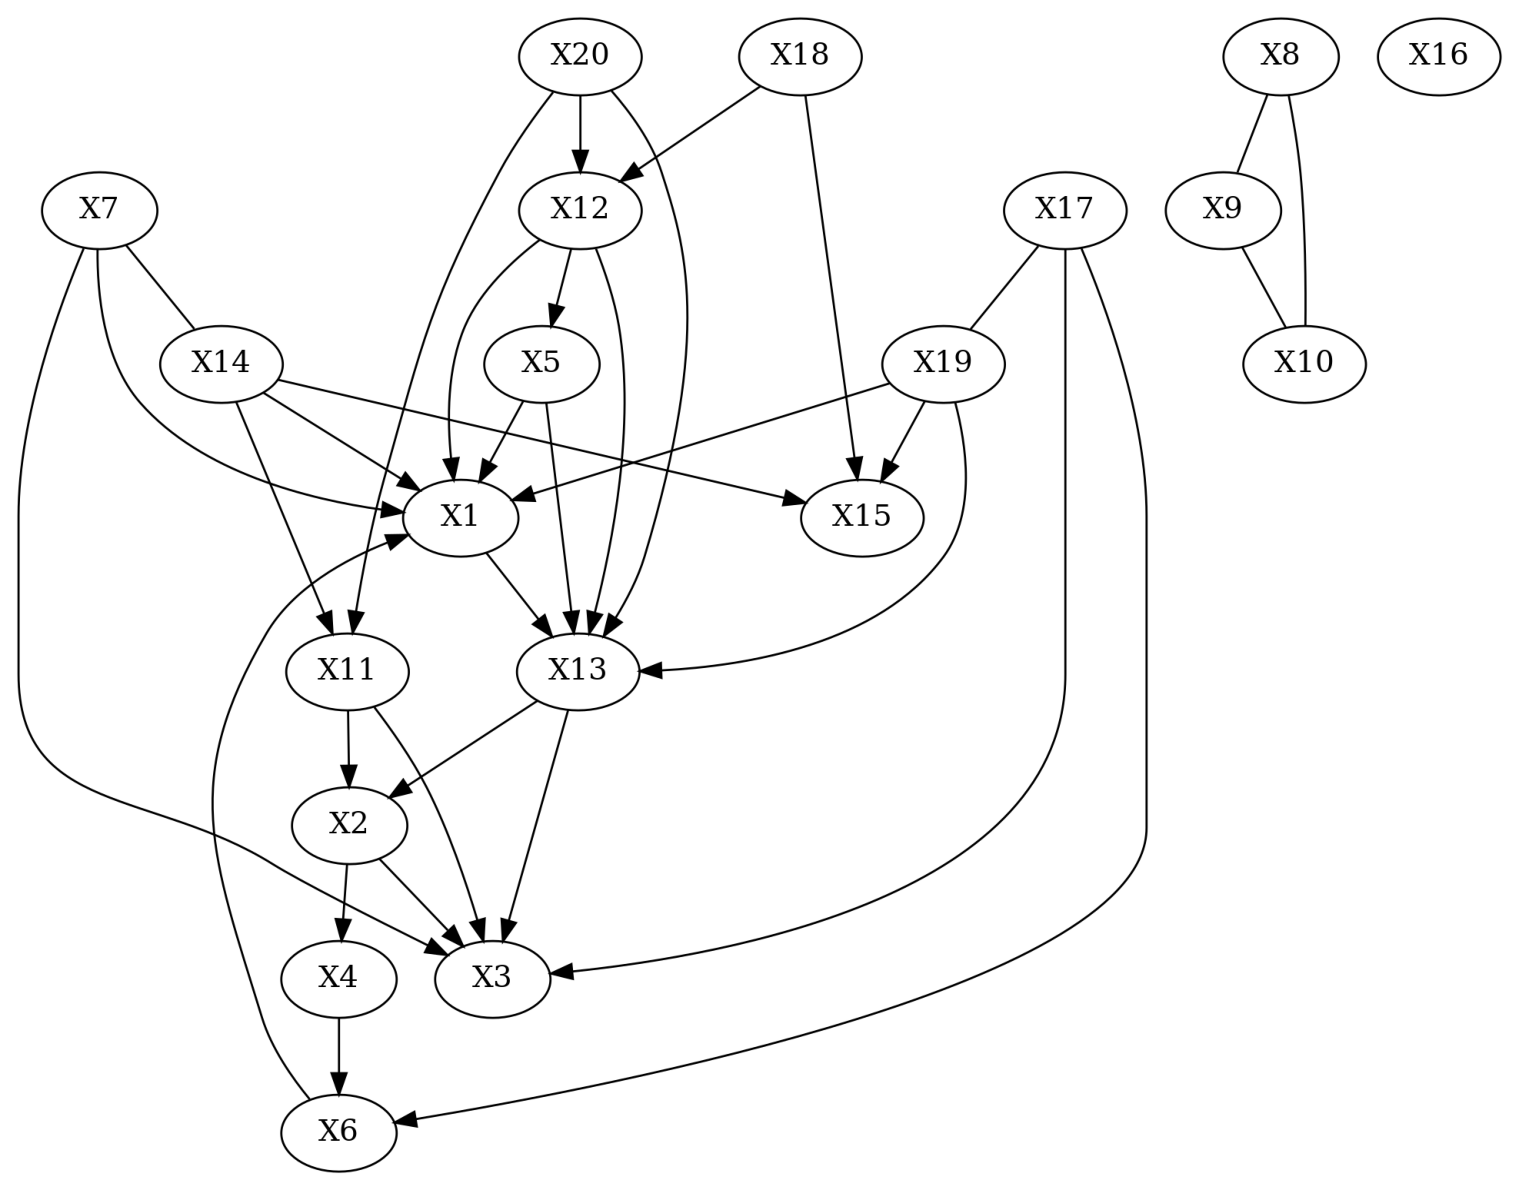

In [17]:
from causallearn.search.ConstraintBased.PC import pc

cg = pc(X, mvpc=True)

cg.draw_pydot_graph()



In [16]:

# Print the columns with their respective indices
for i, col in enumerate(df.columns):
    print(i+1, col)

1 Attrition_Flag
2 Customer_Age
3 Dependent_count
4 Months_on_book
5 Total_Relationship_Count
6 Months_Inactive_12_mon
7 Contacts_Count_12_mon
8 Credit_Limit
9 Total_Revolving_Bal
10 Avg_Open_To_Buy
11 Total_Amt_Chng_Q4_Q1
12 Total_Trans_Amt
13 Total_Trans_Ct
14 Total_Ct_Chng_Q4_Q1
15 Avg_Utilization_Ratio
16 Education_Level_n
17 Income_Category_n
18 Card_Category_n
19 Gender_n
20 Marital_Status_n
